## Семинар 5

# Тема: Метрики качества в задаче регрессии. Оценка обучающей способности модели.

Для оценки качества модели используют коэффициент детерминации и различные функции ошибки.

***Коэффициент детерминации***

**Метрика**  $\mathbf{R^2}$ (r-square, coefficient of determination):  

$$R^2 = 1 - \frac{\sum_{i=1}^{n} ({y}_i - \hat{y}_i)^2}{\sum_{i=1}^{n} ({y}_i - \overline{y})^2},$$ где 
${y}_i$ - истинные значения целевой переменной, $\hat{y}_i$ - предсказанные значения целевой переменной, 
$\overline{y} = \frac{1}{n}\sum_{i=1}^{n} {y}_i$ - среднее истинных значений целевой переменной.

 1. Коэффициент детерминации для разумных моделей принимает значения от 0 до 1 (может быть и отрицательным, когда предсказание хуже, чем предсказание средним значением).
 2. Для приемлемых моделей коэффициент должен быть не меньше 50%.
 3. Модели с коэффициентом детерминации выше 80% можно признать достаточно хорошими.

***Величина ошибки***

Пусть $y_i$ - истинные значения целевой переменной, а $\hat{y}_i$ - предсказанные.

**Метрика MSE** (*mean squared error*):  
$$MSE = \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2$$

**Метрика RMSE** (*root mean squared error*): 
$$RMSE =\sqrt{ \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2}$$

**Метрика MAE** (*mean absolute error*):
$$MAE = \frac{1}{n}\sum_{i=1}^n \left|y_i - \widehat{y}_i\right|$$

**Метрика MAPE** (*mean absolute percentage error*):
$$MAPE =  \frac{1}{n}\sum_{i=1}^n \frac{\left|y_i - \hat{y}_i\right|}{\left |y_i \right |}$$

$$MAPE\cdot 100\%$$

 1. Величина ошибки принимает значения от 0 и выше.
 2. Чем меньше величина ошибки, тем лучше.
 3. Для величины ошибки, которая имеет размерность, нужно правильно её интерпретировать (RMSE = 10000 это не большая ошибка, если целевая переменная представляет собой цену квартиры, измеряемую в миллионах). 

### Обобщающая способность модели 

Обобщающая способность модели - способность делать точные предсказания на новых данных.

Для того, чтобы оценить обобщающую способность модели, необходимо вычислять метрики качества на данных, которые не использовались в процессе построения модели (на данных, которые модель не "видела"). Для этого из исходного набора данных выделяют часть данных и называют эти данные тестовой выборкой.

Обычно 2/3 доступных данных назначают в обучающую выборку, а оставшуюся 1/3 данных – в тестовую выборку. Другими популярными методами разбиения на обучающую/тестовую выборки являются 60/40, 70/30, 80/20 или даже 90/10, если набор данных относительно велик.

В библиотеке `scikit-learn` есть функция `train_test_split`, которая перемешивает набор данных(параметр `shuffle=True` задан по умолчанию) и разбивает его на две части. Выводом функции `train_test_split` являются `X_train`, `X_test`, `y_train` и `y_test`, которые все являются массивами Numpy.

С помощью параметра `test_size` настраиваем нужный размер тестовой выборки (в процентах). По умолчанию 0,25. 
С помощью параметра `stratify` (по умолчанию не используется, т.к. может применяться только в задаче классификации) можно задать стратифицированное разбиение на обучение и тест, чтобы распределение классов зависимой переменной в тестовой выборке соответствовало распределению классов в обучающей. Поскольку разбиение является случайным, надо позаботиться о воспроизводимости результатов. Для этого с помощью парамет `random_state` задаем стартовое значение генератора псевдосл учайных чисел. 


Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import metrics

import sklearn

### **Задание**: Создайте модель линейной регрессии на sklearn для данных о показателе прогрессирования заболевания диабетом. Оцените качество работы модели по метрикам $R^2$ и RMSE.

Загрузим встроенный датасет о показателе прогрессирования заболевания диабетом. 

In [2]:
diabetes = load_diabetes()

Выведем описание рассматриваемоего датасета.

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Обозначим двумерный numpy-массив c признаками за X, а одномерный numpy-массив c целевой переменной за y.

In [4]:
X = diabetes.data
y = diabetes.target

Посмотрим их размеры:

In [5]:
X.shape, y.shape

((442, 10), (442,))

Выведем в виде датафрейма первые 5 строк данных совместно с целвой переменной.

In [6]:
df = pd.DataFrame(data = X, columns = diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Выведем описательную статистику датафрейма:

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


 Разделим данные на обучающую и тестовую части:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Выведем их размеры:

In [9]:
X_train.shape[0], X_test.shape[0]

(331, 111)

In [10]:
X.shape[0]

442

Построим модель линейной регрессии для предсказания прогрессирования заболевания. Создадим экземпляр класса LinearRegression и обучем его на обучающих данных.

In [11]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

LinearRegression()

Сделаем предсказание на тестовых данных:

In [12]:
y_test_pred = model_linreg.predict(X_test)

Оценим обучающую способность, вычислив метрики:

In [13]:
R2 = metrics.r2_score(y_test,y_test_pred)
R2

0.4849058889476757

In [14]:
RMSE = metrics.root_mean_squared_error(y_test,y_test_pred)
RMSE

53.36956671032195

Вывод по качеству модели: Модель довольно плохо описывает данные.

### 1. Загрузите данные о показателе зарплаты в зависимости от опыта работы. Выведите первые 5 строк датафрейма и его размеры.
Указание: Данные можно скачать тут: [salary_data](https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv).

In [15]:
df = pd.read_csv('salary_data.csv')

In [16]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [17]:
df.shape

(30, 2)

### 2. Разделите данные _X_ и целевую переменную y. Сделайте так, чтобы _X_ был двумерным numpy-массивом (вектор-столбцом), а _y_ - одномерным numpy-массивом.

In [18]:
X = np.array(df['YearsExperience']).reshape(-1, 1)
y = np.array(df['Salary'])

In [19]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

### 3.Визуализируйте загруженные данные на диаграмме рассеивания. Сделайте вывод о том, можно ли для этих данных строить линейную модель.

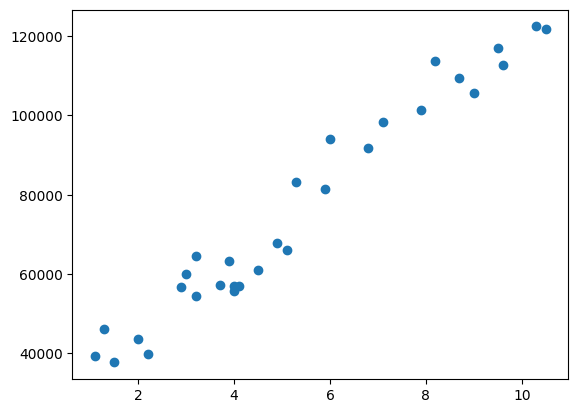

In [20]:
plt.scatter(X, np.array([y]))

plt.show()

### 4. Разделите данные на обучающую и тестовую части. Выведите их размеры. Визуализируйте данные на диаграмме рассеивания, подкрасив обучающую и тестовую части разным цветом.
Указание: Для разделения данных на две части воспользуйтесь [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). В тестовую часть отправьте 20% наблюдений, для этого задайте параметр test_size = 0.2. Также зафиксируйте random_state=0 для воспроизводимости разбиения.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [22]:
X_train.shape,  X_test.shape

((24, 1), (6, 1))

In [23]:
y_train.shape, y_test.shape

((24,), (6,))

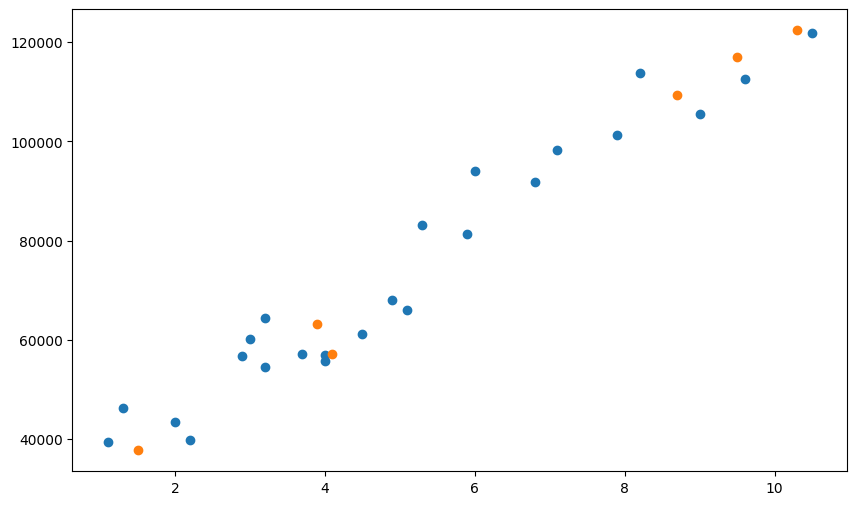

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

### 5. Постройте модель линейной регрессии для предсказания размера заработной платы. Выведите, полученные коэффициенты линии регрессии. 
Указение: Создайте класс LinearRegression и обучите модель на тренировочных данных.

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.intercept_

26780.09915062818

In [27]:
model.coef_

array([9312.57512673])

### 6.Постройте на одном графике найденную линию регрессии и диаграмму рассеивания, подкрасив обучающую и тестовую части разным цветом. 

<function matplotlib.pyplot.show(close=None, block=None)>

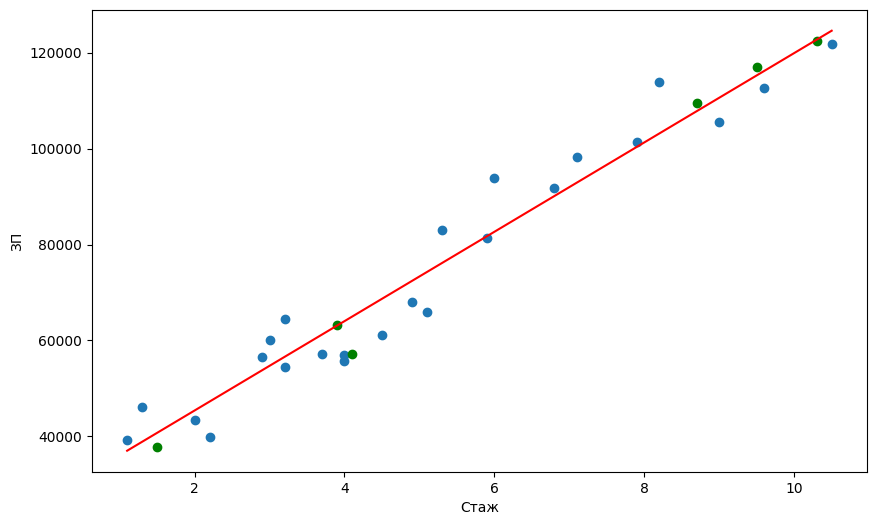

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g')
plt.plot(X, model.predict(X), color='r')
plt.xlabel('Стаж')
plt.ylabel('ЗП')
plt.show

### 7. Сделайте предсказание на тестовых данных. Визуализируйте диаграмму рассеивания истинных и предсказанных значений целевой переменной для тестовых данных и линию идеального их расположения (биссектрису) на одном графике. Сделайте вывод по графику о точности предсказания.

In [29]:
y=np.linspace(y_test.min(), y_test.max(), 100 )

In [30]:
y_test_pred= model.predict(X_test)

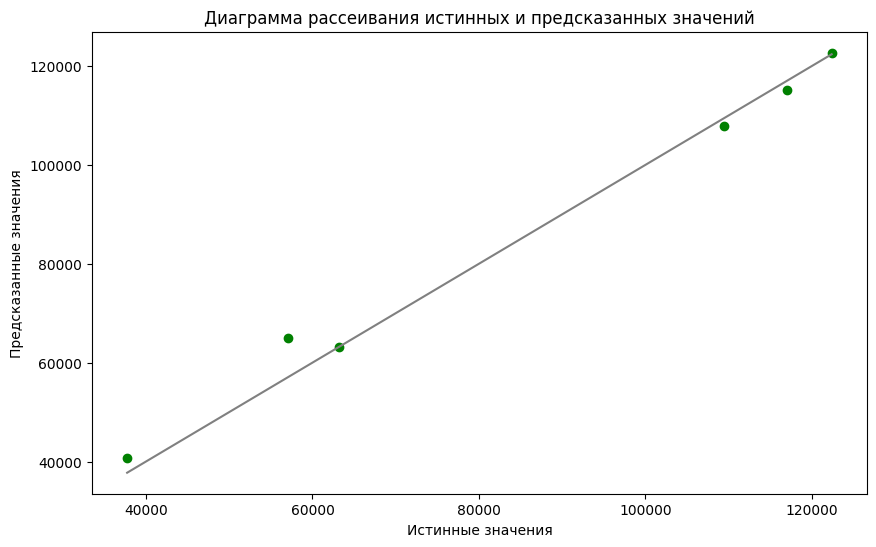

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, color='green')
plt.plot(y,y, color='grey')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Диаграмма рассеивания истинных и предсказанных значений')
plt.show()

### 8. Напишите функцию своими руками, вычисляющую коэффициент детерминации. Вычислите коэффициент детерминации с помощью неё и с помощью библиотечной функции.
Указание: Коэффициент детерминации $R^2 = 1 - \frac{\sum_{i=1}^{n} ({y}_i - \hat{y}_i)^2}{\sum_{i=1}^{n} ({y}_i - \overline{y})^2}$. Пусть функция принимает два вектора - истинные и предсказанные значения. Используйте библиотечную функцию [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) и метод _.score(X_test, y_test)_. Убедитесь, что значения совпадают.

In [32]:
def r2_score(X_test, y_test):
    return 1 - (np.sum((y_test -  model.predict(X_test))**2) / np.sum((y_test - np.mean(y_test))**2))
    
r2_score(X_test, y_test)

0.988169515729126

In [33]:
model.score(X_test, y_test)

0.988169515729126

### 9. Напишите функцию своими руками, вычисляющую ошибку MSE. Вычислите MSE с помощью неё и с помощью библиотечной функции. 
Указание: $MSE = \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2$. Используйте библиотечную функцию [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). 

In [34]:
def MSE(X_test, y_test):
    return (1/len(y_test)) * np.sum((y_test - model.predict(X_test))**2)
MSE(X_test, y_test)

12823412.298126549

In [35]:
metrics.mean_squared_error(y_test, model.predict(X_test))

12823412.298126549

### 10. Вычислите метрику _RMSE_, написав функцию своими руками и используя библиотечную функцию. 
Указание: $RMSE =\sqrt{ \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2}$. Библиотечной функции, соответствующей этой формуле - нет, возьмите корень из MSE.  Используйте функцию [root_mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html). 

In [36]:
def RMSE(X_test, y_test):
    return MSE(X_test, y_test) ** 0.5
RMSE(X_test, y_test)

3580.979237321343

In [37]:
sklearn.metrics.root_mean_squared_error(y_test, model.predict(X_test))

3580.979237321343

### 11. Вычислите метрику _MAE_, написав функцию своими руками и используя библиотечную функцию. 
Указание: $MAE = \frac{1}{n}\sum_{i=1}^n \left|y_i - \widehat{y}_i\right|$. Используйте функцию [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).

In [38]:
def MAE(X_test, y_test):
    return (1/len(y_test)) * np.sum(abs(y_test - model.predict(X_test)))
MAE(X_test, y_test)

2446.172369046505

In [39]:
sklearn.metrics.mean_absolute_error(y_test, model.predict(X_test))

2446.1723690465055

### 12. Вычислите метрику _MAPE_, написав функцию своими руками и используя библиотечную функцию. 
Указание: $MAPE = \frac{1}{n}\sum_{i=1}^n \frac{\left|y_i - \hat{y}_i\right|}{\left |y_i \right |}$. Используйте функцию [mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html). 

In [40]:
def MAPE(X_test, y_test):
    return (1/len(y_test)) * np.sum(abs(y_test - model.predict(X_test)) / abs(y_test))
MAPE(X_test, y_test)

0.042009635296206715

In [41]:
sklearn.metrics.mean_absolute_percentage_error(y_test, model.predict(X_test))

0.042009635296206715

### 13. Загрузите встроенные данные о показателе медианной стоимости дома в округах Калифорнии. Выведите описание датасета. Обозначьте двумерный numpy-массив c признаками за X, а одномерный numpy-массив c целевой переменной за y. Выведите их размеры.
Указание: Используйте встроенные данные [fetch_california_housing](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_california_housing.html).

In [42]:
housing = sklearn.datasets.fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [43]:
X = housing.data
y = housing.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [44]:
X.shape, y.shape

((20640, 8), (20640,))

### 14. Выведите первые пять строк данных в виде датафрейма, добавив в него и столбец с целевой переменной. Выведите описательную статистику этого датафрейма. Убедитесь, что все значения в датафрейме числовые и данные не имеют пропусков. Выведите количество уникальных значений целевой переменной. 

In [45]:
df = pd.DataFrame(data = X, columns = housing.feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [47]:
df['MedInc'].unique()

array([8.3252, 8.3014, 7.2574, ..., 2.3598, 2.3661, 2.0943])

In [62]:
for column_name in df.columns:

    unique_values = df[column_name].unique()
    print(f"Unique values in {column_name}: {unique_values}\n")

Unique values in MedInc: [8.3252 8.3014 7.2574 ... 2.3598 2.3661 2.0943]

Unique values in HouseAge: [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.  2. 46. 26. 20. 17. 36. 19. 23.
 38. 35. 10. 16. 27. 39. 31. 29. 22. 37. 28. 34. 32. 47. 44. 30. 18. 45.
 33. 24. 15. 14. 13. 25.  5. 12.  6.  8.  9.  7.  3.  4. 11.  1.]

Unique values in AveRooms: [6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]

Unique values in AveBedrms: [1.02380952 0.97188049 1.07344633 ... 1.14825581 1.17191977 1.16226415]

Unique values in Population: [ 322. 2401.  496. ... 3060. 2707. 6912.]

Unique values in AveOccup: [2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]

Unique values in Latitude: [37.88 37.86 37.85 37.84 37.83 37.82 37.81 37.8  37.79 37.77 37.78 37.76
 37.75 37.74 37.73 37.9  37.89 37.87 37.72 37.71 37.7  37.69 37.68 37.64
 37.63 37.66 37.65 37.67 37.61 37.62 37.6  37.59 37.58 37.57 37.49 37.52
 37.56 37.55 37.54 37.53 37.51 37.48 37.47 37.5  38.69 38.72 38.52 

### 15. Разделите данные на обучающую и тестовую части. Выведите их размеры. 

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [64]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [65]:
y_train.shape, y_test.shape

((16512,), (4128,))

In [66]:
X_train[:, 0]

array([4.2386, 4.3898, 3.9333, ..., 3.1977, 5.6315, 1.3882])

### 16. Постройте модель линейной регрессии для предсказания медианной стоимости дома в округах Калифорнии. Выведите, полученные коэффициенты  гиперплоскости.
Указение: Создайте класс LinearRegression и обучите модель на тренировочных данных.

In [67]:
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)

LinearRegression()

In [69]:
model.intercept_

-36.85856910680116

In [70]:
model.coef_[0]

0.4333334066887782

### 17. Сделайте предсказание на тестовых данных. Визуализируйте диаграмму рассеивания истинных и предсказанных значений целевой переменной для тестовых данных и линию идеального их расположения. Сделайте предположение о точности предсказания.

In [71]:
y_test_pred= model.predict(X_test)

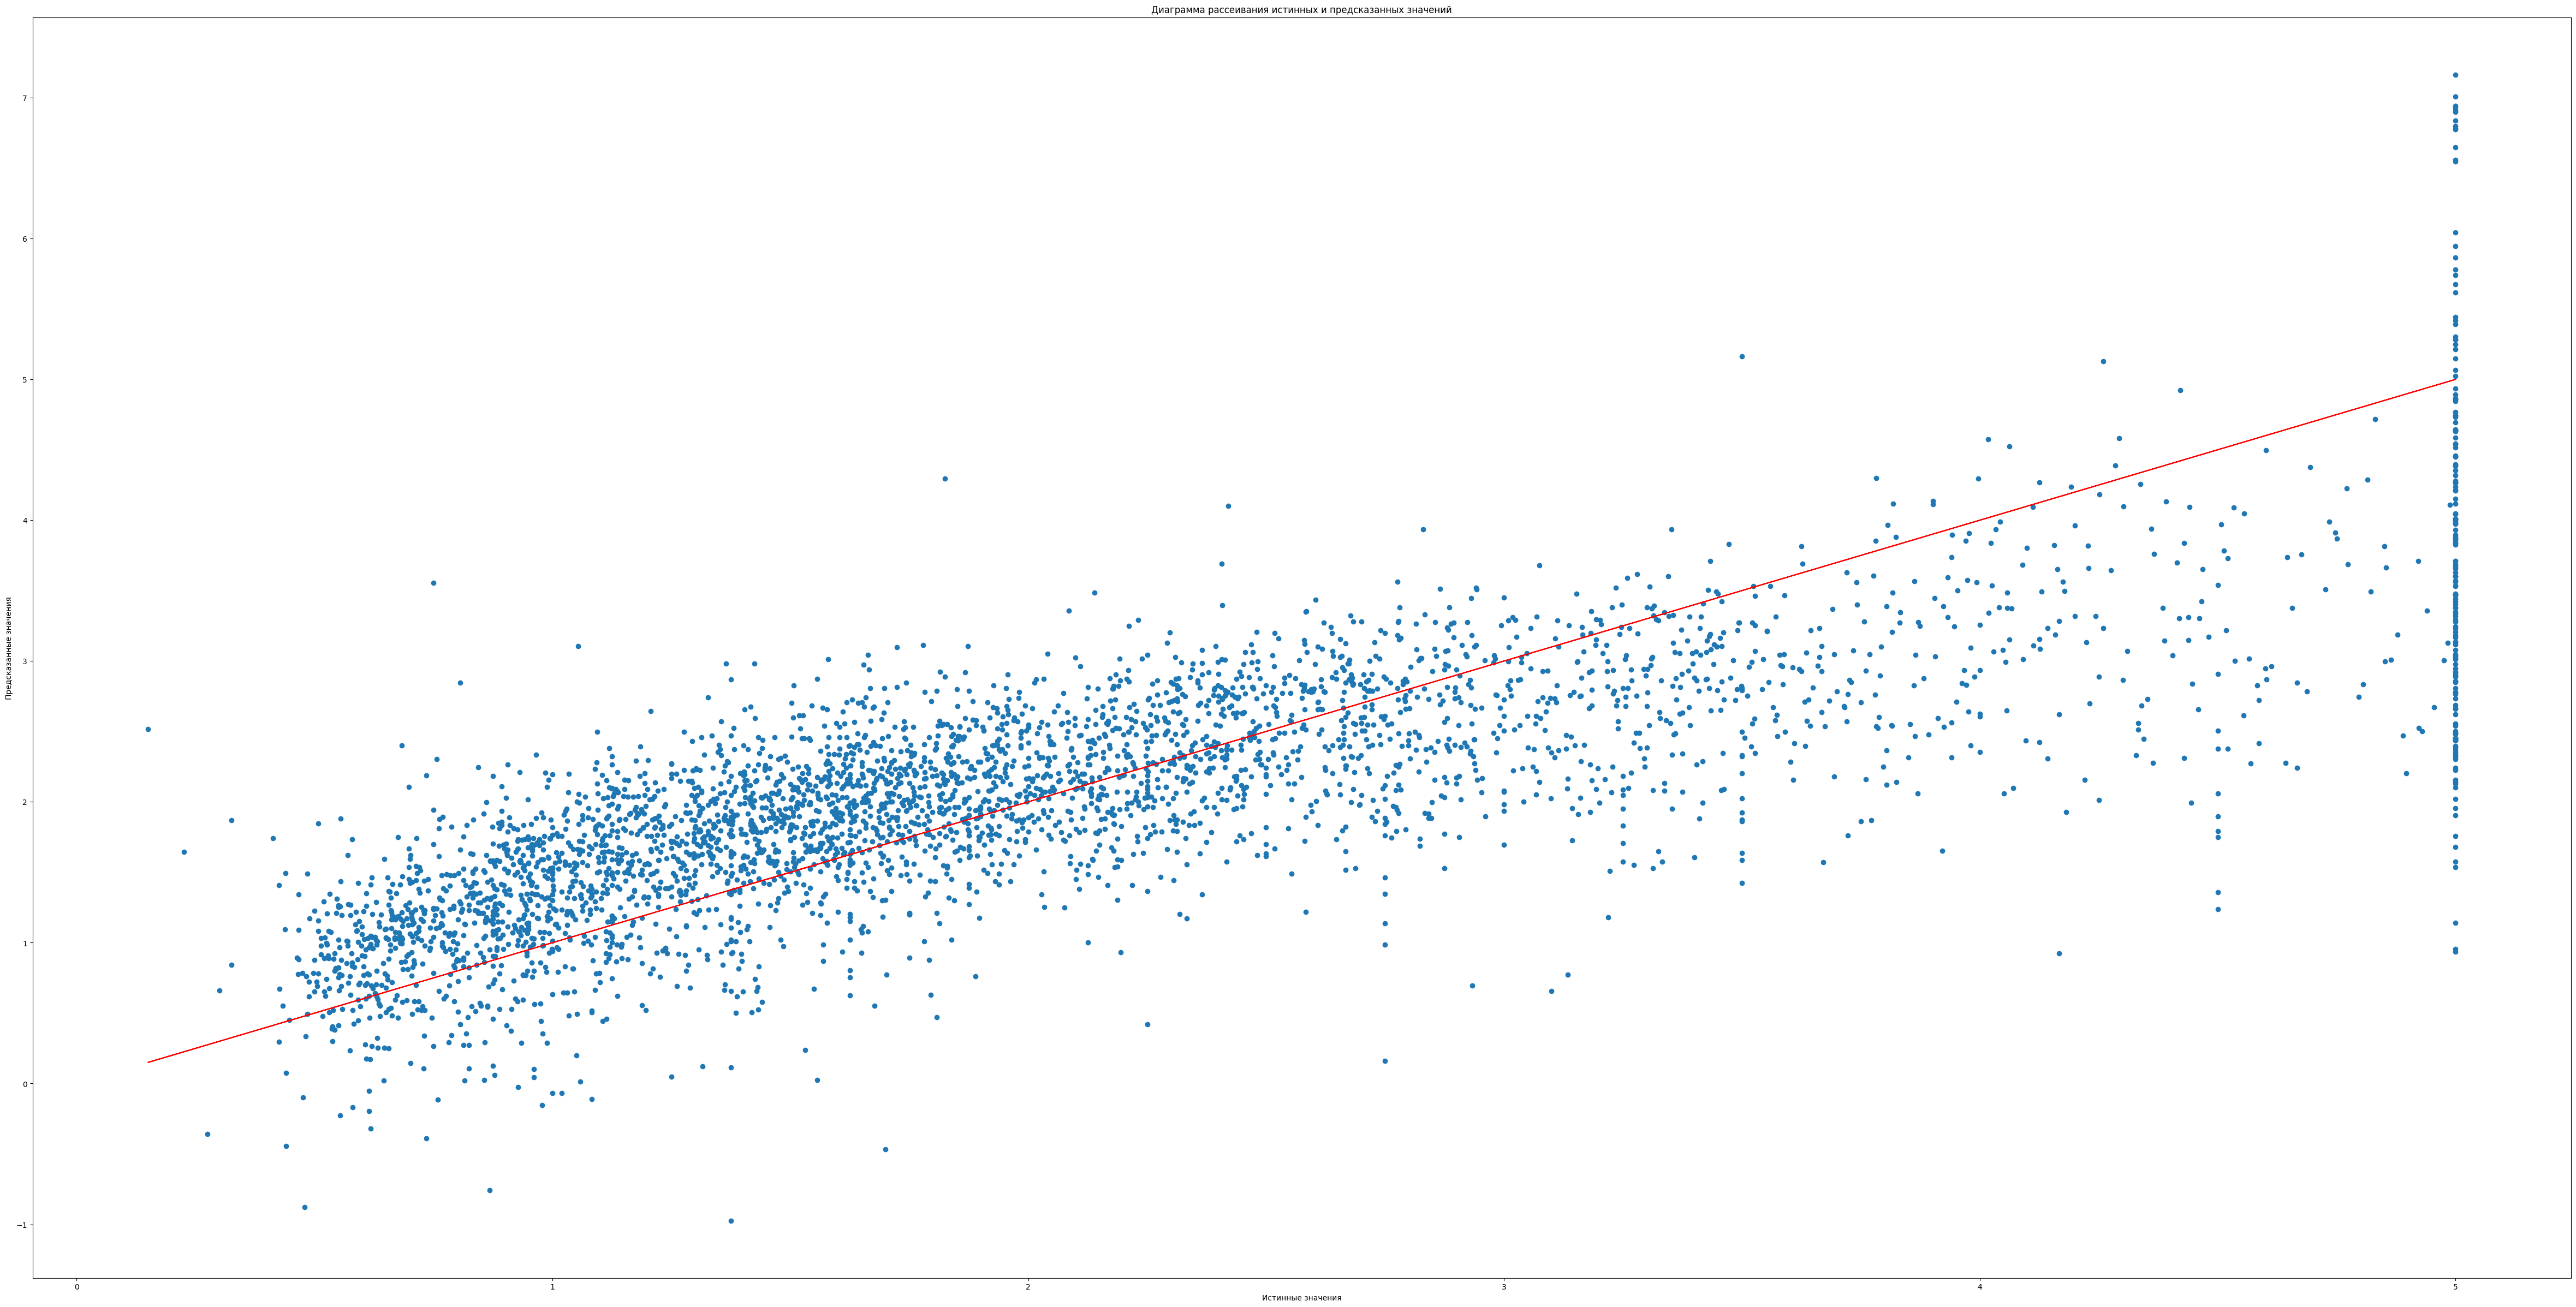

In [79]:
plt.figure(figsize=(60,30))
plt.scatter(y_test, y_test_pred)
plt.plot(y_test,y_test, color='r')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Диаграмма рассеивания истинных и предсказанных значений')
plt.show()

### 18. Вычислите метрики: коэффициент детерминации и ошибка RMSE. Сделайте вывод о качестве работы модели линейной регрессии для этих данных. 

In [73]:
RMSE(X_train, y_train)

0.7234924745376033

In [74]:
r2_score(X_train, y_train)

0.6088968118672871